# Compression Heat Map

In [1]:
import pandas as pd

In [2]:
lossy_df = pd.read_csv('output/cavs_mini_lossy.csv') #Id be skeptical about these results and also I am not using lossy anyway
#lossless_df = pd.read_csv('output/cavs_mini_lossless.csv')
#lossless_df = pd.read_csv("/home/aniemcz/CAVSSegMini/output/cavs_mini_lossless_binary_plz_work.csv")

In [3]:
#lossless_df

In [4]:
compressors_dict = {}

In [5]:
import math
data = lossy_df[['compressor', 'CR', 'psnr', 'ssim', 'total_time', 'compressed_size_bytes', 'uncompressed_size_bytes', 'bound']]

compressors = ['SZ3', 'ZFP', 'Uncompressed']
error_bounds = ['1E-7', '1E-6', '1E-5', '1E-4', '1E-3', '1E-2', '1E-1']
bounds = [math.exp(-7),math.exp(-6),math.exp(-5),math.exp(-4),math.exp(-3),math.exp(-2),math.exp(-1)]

def isclose(x, ref_value):
    return math.isclose(x, ref_value)

for comp in compressors:
    if comp != 'Uncompressed':
        comp_df = data[data['compressor'] == comp.lower()] #pick the compressor
        compressors_dict[comp] = {}

        for idx, bound in enumerate(bounds):
            
            compressors_dict[comp][error_bounds[idx]] = {}
            comp_error_df = comp_df[comp_df['bound'].apply(isclose, args=[bound]) ]
            
            mean_cr = (comp_error_df['uncompressed_size_bytes']/comp_error_df['compressed_size_bytes']).mean()
            mean_psnr = (comp_error_df['psnr']).mean()
            mean_ssim = (comp_error_df['ssim']).mean()
            total_time = comp_error_df['total_time'].sum()
            compressed_size_bytes = comp_error_df['compressed_size_bytes'].sum()
            uncompressed_size_bytes = comp_error_df['uncompressed_size_bytes'].sum() #sum to treat it like total size for dataset

            compressors_dict[comp][error_bounds[idx]]["cr"] = mean_cr
            compressors_dict[comp][error_bounds[idx]]["psnr"] = mean_psnr
            compressors_dict[comp][error_bounds[idx]]["ssim"] = mean_ssim
            compressors_dict[comp][error_bounds[idx]]["total_time"] = total_time
            compressors_dict[comp][error_bounds[idx]]["compressed_size_bytes"] = compressed_size_bytes 
            compressors_dict[comp][error_bounds[idx]]["uncompressed_size_bytes"] = uncompressed_size_bytes

            print(f"num images is: {comp_error_df.shape}")
            print(f"Error Bound: {error_bounds[idx]}")
            print(f"The mean CR for rows with compressor '{comp}' is: {mean_cr}")
            print(f"The mean psnr for rows with compressor '{comp}' is: {mean_psnr}")
            print(f"The mean ssim for rows with compressor '{comp}' is: {mean_ssim}")
            print(f"The time taken for rows with compressor '{comp}' is: {total_time} seconds")
            print(f"The size it compressed it to with compressor '{comp}' is: {compressed_size_bytes} bytes")
            print(f"Uncompressed size is is: {uncompressed_size_bytes} bytes")
            
        print("\n")

num images is: (544, 8)
Error Bound: 1E-7
The mean CR for rows with compressor 'SZ3' is: 4.487680767486573
The mean psnr for rows with compressor 'SZ3' is: 65.64899915998383
The mean ssim for rows with compressor 'SZ3' is: 0.0021007332289751193
The time taken for rows with compressor 'SZ3' is: 33.03665590286252 seconds
The size it compressed it to with compressor 'SZ3' is: 701903181 bytes
Uncompressed size is is: 3256784640 bytes
num images is: (544, 8)
Error Bound: 1E-6
The mean CR for rows with compressor 'SZ3' is: 5.66249271410109
The mean psnr for rows with compressor 'SZ3' is: 56.9596241499403
The mean ssim for rows with compressor 'SZ3' is: 0.002088169944742844
The time taken for rows with compressor 'SZ3' is: 31.531934261321997 seconds
The size it compressed it to with compressor 'SZ3' is: 551228015 bytes
Uncompressed size is is: 3256784640 bytes
num images is: (544, 8)
Error Bound: 1E-5
The mean CR for rows with compressor 'SZ3' is: 7.7470649247112435
The mean psnr for rows wit

In [6]:
'''
import os
import tqdm

def get_size(start_path = '/scratch/aniemcz/CAT2/CAT/mixed/Train/imgs/'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return total_size

sizeB = get_size(start_path='/scratch/aniemcz/CAT2/CAT/mixed/Train/imgs/')
print(sizeB, 'bytes')
sizeKb = sizeB/1000
#print(sizeKb, "Kilobytes KB")
sizeMb = sizeKb/1000
#print(sizeMb, "Megabytes MB")
sizeGb = sizeMb/1000
#print(sizeGb, "Gigabytes GB")
'''

'\nimport os\nimport tqdm\n\ndef get_size(start_path = \'/scratch/aniemcz/CAT2/CAT/mixed/Train/imgs/\'):\n    total_size = 0\n    for dirpath, dirnames, filenames in os.walk(start_path):\n        for f in filenames:\n            fp = os.path.join(dirpath, f)\n            # skip if it is symbolic link\n            if not os.path.islink(fp):\n                total_size += os.path.getsize(fp)\n\n    return total_size\n\nsizeB = get_size(start_path=\'/scratch/aniemcz/CAT2/CAT/mixed/Train/imgs/\')\nprint(sizeB, \'bytes\')\nsizeKb = sizeB/1000\n#print(sizeKb, "Kilobytes KB")\nsizeMb = sizeKb/1000\n#print(sizeMb, "Megabytes MB")\nsizeGb = sizeMb/1000\n#print(sizeGb, "Gigabytes GB")\n'

In [7]:
1898489280 / 1290635868

1.470972043371105

In [8]:
#in MiB per second
bandwidths = [1000, 100, 50, 10, 5,] #lets say this is in Mb per second

compressors = ['SZ3', 'ZFP', 'Uncompressed']

compressor_labels = []

error_bounds = ['1E-7', '1E-6', '1E-5', '1E-4', '1E-3', '1E-2', '1E-1']

for comp in compressors:
    if comp != 'Uncompressed':
        for error_bound in error_bounds:
            label = '{} CR:{:0.2f}'.format(comp, compressors_dict[comp][error_bound]["cr"])
    else:
        label = "Uncompressed"
    compressor_labels.append(label)
    
compressor_labels

['SZ3 CR:369.26', 'ZFP CR:6.97', 'Uncompressed']

In [9]:
compressors_dict['SZ3']

{'1E-7': {'cr': 4.487680767486573,
  'psnr': 65.64899915998383,
  'ssim': 0.0021007332289751193,
  'total_time': 33.03665590286252,
  'compressed_size_bytes': 701903181,
  'uncompressed_size_bytes': 3256784640},
 '1E-6': {'cr': 5.66249271410109,
  'psnr': 56.9596241499403,
  'ssim': 0.002088169944742844,
  'total_time': 31.531934261321997,
  'compressed_size_bytes': 551228015,
  'uncompressed_size_bytes': 3256784640},
 '1E-5': {'cr': 7.7470649247112435,
  'psnr': 48.27519216680389,
  'ssim': 0.0020623873391255347,
  'total_time': 29.75329923629758,
  'compressed_size_bytes': 394479718,
  'uncompressed_size_bytes': 3256784640},
 '1E-4': {'cr': 12.224995235945983,
  'psnr': 39.6133980124062,
  'ssim': 0.001989999822327694,
  'total_time': 27.50495767593381,
  'compressed_size_bytes': 245980346,
  'uncompressed_size_bytes': 3256784640},
 '1E-3': {'cr': 23.75074054261566,
  'psnr': 31.326349040513968,
  'ssim': 0.0018755086369138612,
  'total_time': 25.292006492614718,
  'compressed_size_b

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
#compression_ratios = np.linspace(1, 10, 20)  # From 1:1 to 10:1
#compressors = ['zstd','blosclz','lz4','lz4hc','zlib'] #all are lossless except for zfp and sz3 which are lossy (for now lets only include lossless)

# Create a 2D array for the heat map values
# This example uses random data - replace with your actual measurements
#These are the times it takes for that configuration to theoretically send
data = np.random.rand(len(bandwidths), len(compressor_labels))

#time_to_compress + compressed_dataset_size / (transfer bandwidth) + time_to_decompress

#compressed_ds_size = ogsize / cr
#comp_time_avg + (compress_ds_size / bandwidths[i]) + decomp_time_avg OR (compress_ds_size / bandwidths[i]) + total_time_to_compress_and_decompress

#although I got a mismatch in uncompressed_ds_size for libpressio and for doing os.path.getsize, for consistency libpressio's numbers will be used

#converted to megabytes
uncompressed_ds_size = compressors_dict[compressors[0]]['1E-1']["uncompressed_size_bytes"] / 1000000

print(uncompressed_ds_size)

for idx_i, comp in enumerate(compressors):
    #compressed_ds_size = original_ds_size / compressors_dict[comp]["cr"] #og_ds_size / cr
    if comp != 'Uncompressed':
        #divide by 1000000 to convert it from bytes to megabytes (mb is 1e6 bytes)
        compressed_ds_size = compressors_dict[comp]['1E-1']["compressed_size_bytes"] / 1000000
    
    for idx_j, bw in enumerate(bandwidths):
        if comp != 'Uncompressed':
            #for compressors
            data[idx_j][idx_i] = (compressed_ds_size / bw) + compressors_dict[comp]['1E-1']["total_time"]
        else:
            #for without a compressor
            data[idx_j][idx_i] = (uncompressed_ds_size / bw)

3256.78464


In [11]:
compressors_dict

{'SZ3': {'1E-7': {'cr': 4.487680767486573,
   'psnr': 65.64899915998383,
   'ssim': 0.0021007332289751193,
   'total_time': 33.03665590286252,
   'compressed_size_bytes': 701903181,
   'uncompressed_size_bytes': 3256784640},
  '1E-6': {'cr': 5.66249271410109,
   'psnr': 56.9596241499403,
   'ssim': 0.002088169944742844,
   'total_time': 31.531934261321997,
   'compressed_size_bytes': 551228015,
   'uncompressed_size_bytes': 3256784640},
  '1E-5': {'cr': 7.7470649247112435,
   'psnr': 48.27519216680389,
   'ssim': 0.0020623873391255347,
   'total_time': 29.75329923629758,
   'compressed_size_bytes': 394479718,
   'uncompressed_size_bytes': 3256784640},
  '1E-4': {'cr': 12.224995235945983,
   'psnr': 39.6133980124062,
   'ssim': 0.001989999822327694,
   'total_time': 27.50495767593381,
   'compressed_size_bytes': 245980346,
   'uncompressed_size_bytes': 3256784640},
  '1E-3': {'cr': 23.75074054261566,
   'psnr': 31.326349040513968,
   'ssim': 0.0018755086369138612,
   'total_time': 25.29

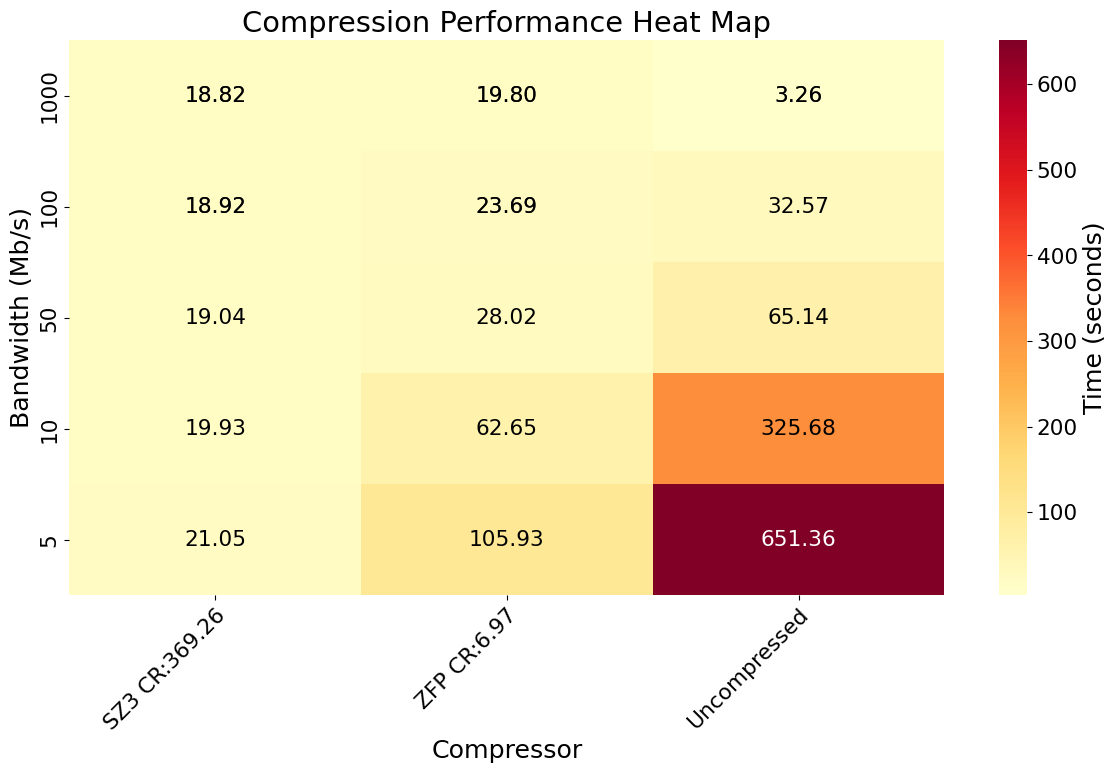

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the heat map
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data, xticklabels=compressor_labels, yticklabels=bandwidths,
            cmap='YlOrRd',fmt='.2f', annot=True, ax=ax, cbar=True, cbar_kws={'label': 'Time (seconds)'})

# Function to determine text color based on background
def text_color_for_background(value):
    threshold = (data.max() - data.min()) / 2.0 + data.min()
    return 'white' if value > threshold else 'black'

# Manually add text with conditional coloring
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        value = data[i, j]
        text_color = text_color_for_background(value)
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}',
                ha="center", va="center", color=text_color)

plt.xlabel('Compressor')
plt.ylabel('Bandwidth (Mb/s)')
plt.title('Compression Performance Heat Map')

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Adjust layout
plt.tight_layout()

# Save the figure as PNG
#plt.savefig('lossy_compression_heatmap_final.jpg', dpi=500, bbox_inches='tight')

# If you still want to display the plot, keep this line
plt.show()

In [15]:
#font Times New Roman
#make text bigger

In [1]:
# Set the global font to Times New Roman
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = "Times New Roman"
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Nimbus Roman']

NameError: name 'data' is not defined

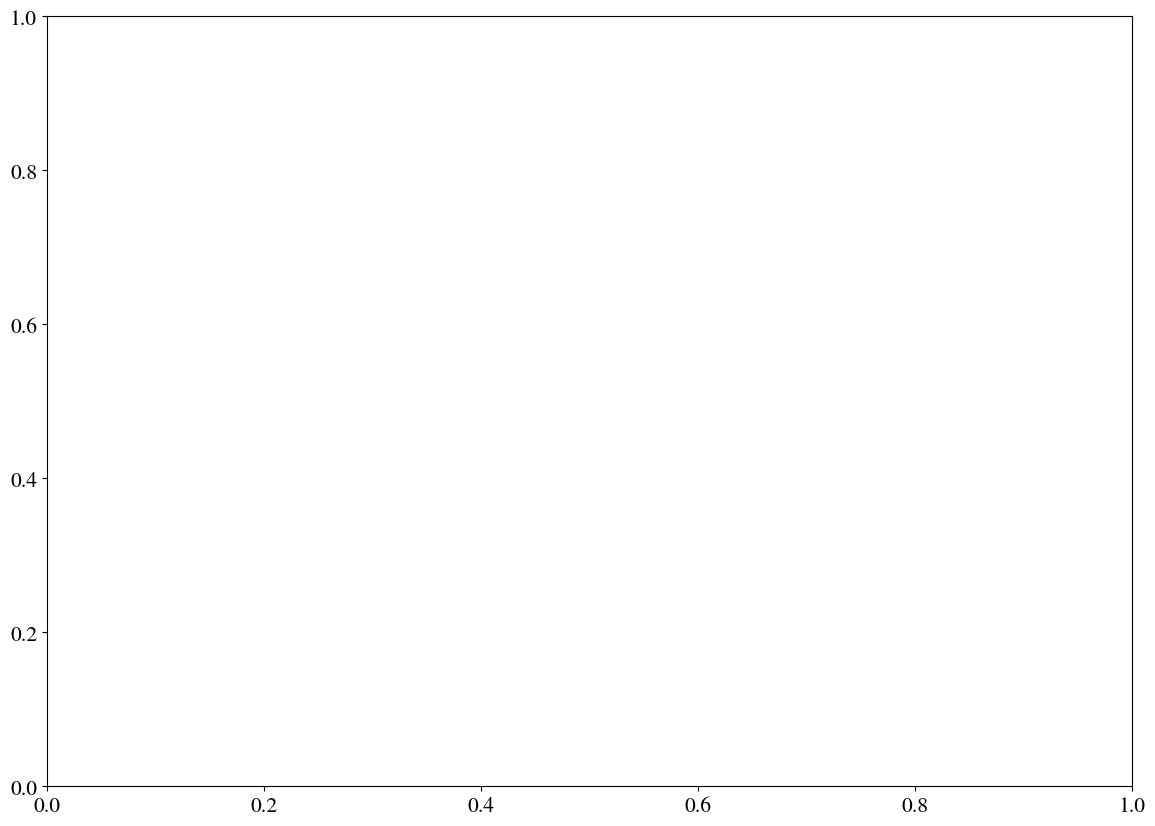

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Increase the font sizes
SMALL_SIZE = 12*1.3
MEDIUM_SIZE = 14*1.3
BIGGER_SIZE = 16*1.3

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Create the heat map
fig, ax = plt.subplots(figsize=(14, 10))  # Increased figure size
sns.heatmap(data, xticklabels=compressor_labels, yticklabels=bandwidths,
            cmap='YlOrRd', fmt='.2f', annot=True, ax=ax, cbar=True, 
            cbar_kws={'label': 'Time (seconds)'}, annot_kws={"size": SMALL_SIZE})

# Function to determine text color based on background
def text_color_for_background(value):
    threshold = (data.max() - data.min()) / 2.0 + data.min()
    return 'white' if value > threshold else 'black'

# Manually add text with conditional coloring
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        value = data[i, j]
        text_color = text_color_for_background(value)
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}',
                ha="center", va="center", color=text_color, fontsize=SMALL_SIZE)

plt.xlabel('Compressor', fontsize=MEDIUM_SIZE)
plt.ylabel('Bandwidth (Mb/s)', fontsize=MEDIUM_SIZE)
plt.title('Compression Performance Heat Map', fontsize=BIGGER_SIZE)

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Adjust layout
plt.tight_layout()

# Save the figure as PNG
plt.savefig('lossy_compression_heatmap_final.jpg', dpi=500, bbox_inches='tight')

# If you still want to display the plot, keep this line
plt.show()

In [ ]:
'''
Class Background: 408061569 pixels
Class Sedan: 198512576 pixels
Class Pickup: 110858635 pixels
Class Offroad: 186795700 pixels
'''

In [10]:
background = 408061569
sedan = 198512576
pickup = 110858635
offroad = 186795700


print("{:.2e}".format(408061569))
print("{:.2e}".format(198512576))
print("{:.2e}".format(110858635))
print("{:.2e}".format(186795700))

4.08e+08
1.99e+08
1.11e+08
1.87e+08


/local_scratch/slurm.307362/ipykernel_788582/2136608929.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, fontweight='bold', rotation=45)


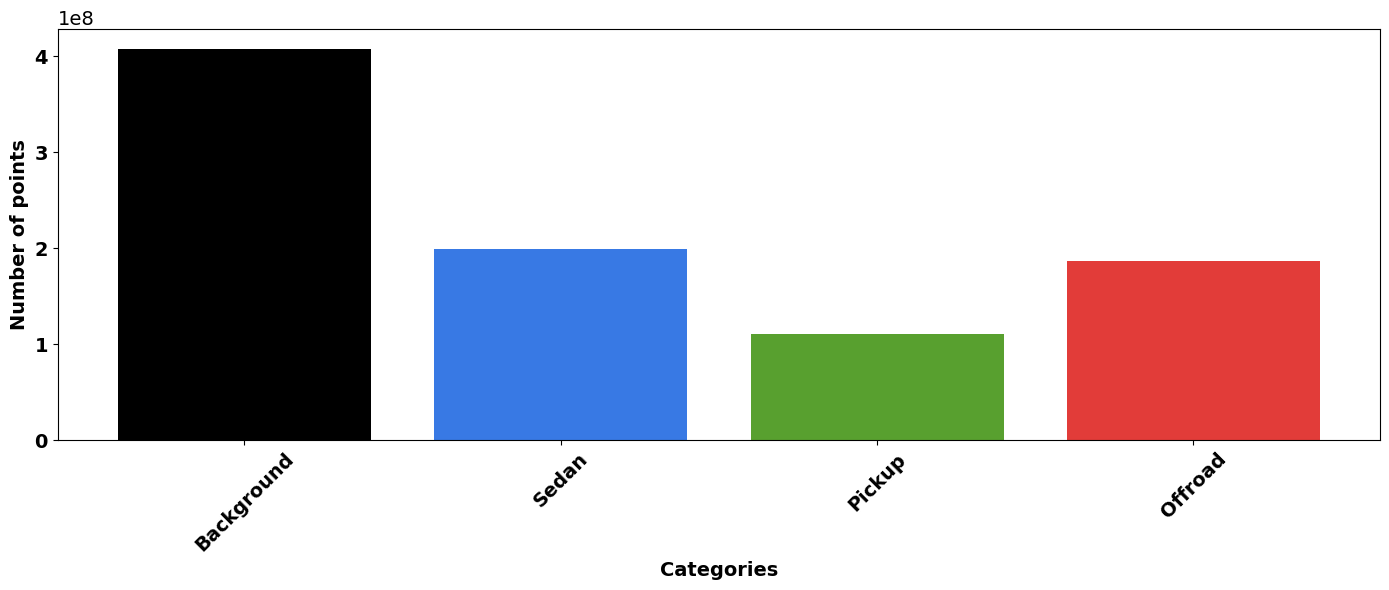

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter, FuncFormatter

# Data from the provided image
categories = ["Background", "Sedan", "Pickup", "Offroad"]
values = [
    4.08e+08,
    1.99e+08,
    1.11e+08,
    1.87e+08,
]

# RGB colors
colors = [
    (0, 0, 0),      # black
    (56/255, 121/255, 228/255),      # blue
    (88/255, 160/255, 47/255),      # green
    (226/255, 60/255, 57/255)       # red
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot bars
bars = ax.bar(categories, values, color=colors)

# Label the plot
ax.set_xlabel('Categories', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of points', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', labelsize=14, rotation=45)
ax.set_xticklabels(categories, fontweight='bold', rotation=45)

# Set y-axis ticks to 0, 1, 2, 3, 4
ax.set_yticks([0, 1e8, 2e8, 3e8, 4e8])
ax.set_yticklabels(['0', '1', '2', '3', '4'])

# Make y-axis labels bold
for label in ax.get_yticklabels():
    label.set_fontsize(14)
    label.set_fontweight('bold')

# Format y-axis with scalar formatter to show offset
formatter = ScalarFormatter()
#formatter.set_scientific(True)
ax.yaxis.set_major_formatter(formatter)

# Adjust offset text
ax.yaxis.get_offset_text().set_fontsize(14)
#ax.yaxis.get_offset_text().set_fontweight('bold')

# Show plot
plt.tight_layout()

plt.savefig("cavs_class_distribution.png", dpi=500, bbox_inches='tight')

plt.show()
#plt.savefig("cavs_class_distribution.png")